In [24]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import linalg as la

In [25]:
def model(x, truth_beta):
    return truth_beta[0]*np.exp(x/truth_beta[1])


def Fval(x, y, beta):
    return model(x, beta) - y


def Jac(x, beta):
    return np.array([np.exp(x/beta[1]), -(beta[0]/beta[1]**2)*np.exp(x/beta[1])*x])

In [26]:
beta_truth = [0.15, 3.75]
x_train = np.linspace(0, 10, num=50)
y_train = model(x_train, beta_truth) + np.random.normal(0, 0.2, size=len(x_train))

Iteration:  0 -- Error: 4.0220e+03
Iteration:  1 -- Error: 4.7798e+01
Iteration:  2 -- Error: 4.1926e+01
Iteration:  3 -- Error: 2.0382e-06
Iteration:  4 -- Error: 3.9787e-01
Iteration:  5 -- Error: 2.3358e+01
Iteration:  6 -- Error: 5.4693e+01
Iteration:  7 -- Error: 8.4625e+01
Iteration:  8 -- Error: 2.1196e+00
Iteration:  9 -- Error: 1.2550e-02
Iteration: 10 -- Error: 1.1246e-05
Iteration: 11 -- Error: 3.7718e-07
>>> Convergence achieved!

Parameters: [0.141244   3.69904073] 
Error:  3.771755303063522e-07 
Number of Iterations:  11


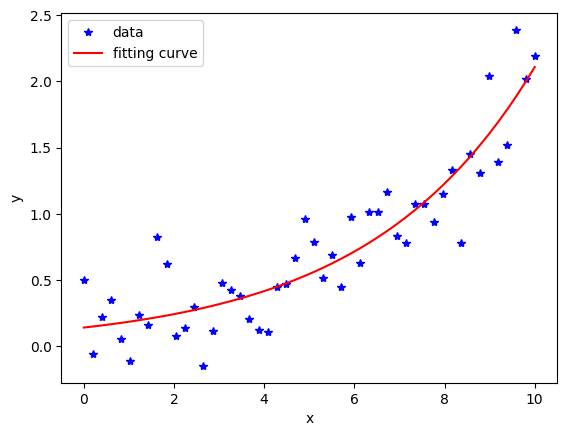

In [83]:
def armijo_line_search(Fx, x, y, Jt, beta, dt, stepsize=1, t=0.5, c=1e-4):
    alpha_t = 1.0
    Ft = Fx(x, y, beta)
    while True:
        next_beta = beta - alpha_t * stepsize * dt
        next_Ft = Fx(x, y, next_beta)
        # Armijo Rule
        if la.norm(Ft) - la.norm(next_Ft) >= alpha_t * c * stepsize * la.norm(Jt.T.dot(-dt)) ** 2:
            break
        alpha_t *= t
    return next_beta


def GN_Armijo(Fx, Jac, x, y, beta0, stepsize=1, maxiter=100, tol=1e-6):
    """Gauss-Newton method with Armijo Linesearch

    Args:
        Fx: Objective function
        Jac: Jacobian of Fx
        x: x data
        y: y data
        beta0: initial beta parameter point
        eta0: stepsize. Defaults to 1.
        maxiter: maximum number of iterations. Defaults to 100.
        tol: error tolerance. Defaults to 1e-3.

    Returns:
        beta: the approximation of parameters
        err: the error
        t: the last iteration
    """
    beta = beta0
    err = 0
    for t in range(maxiter):
        Ft = Fx(x, y, beta)
        Jt = Jac(x, beta)
        St = la.pinv(Jt.dot(Jt.T))
        yt = Jt.dot(Ft).T
        dt = np.ravel(St.dot(yt))
        err = la.norm(yt)

        # Perform Armijo Line-search to find the best next beta
        beta = armijo_line_search(Fx, x, y, Jt, beta, dt, stepsize, t=0.9)

        print("Iteration: {0:2d}".format(t), "-- Error: {0:5.4e}".format(err))
        if err <= tol:
            print(">>> Convergence achieved!")
            break
    return beta, err, t


# We run it.
beta0 = [70, 70]
beta_best, err, n_it = GN_Armijo(
    Fval, Jac, x_train, y_train, beta0=beta0, maxiter=100)
print("\nParameters:", beta_best, "\nError: ",
      err, "\nNumber of Iterations: ", n_it)

# Plotting
plt.plot(x_train, y_train, 'b*', label='data')
plt.plot(x_train, model(x_train, beta_best), "-r", label="fitting curve")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()